<a href="https://colab.research.google.com/github/niharkulkarni1234/Minor-projects/blob/main/Minor_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Project**

Analyzing the Impact of Advertising Spend on Sales Across Multiple Channels

# **Project overview**

In this project, I build a Simple Linear Regression model to study the linear relationship between Sales and Advertising dataset for a dietary weight control product.

# **PROBLEM STATEMENT**


The primary objective of this project is to develop a  Linear Regression model to analyze the relationship between advertising expenditures across different channels (TV, radio, and newspaper) and product sales. We aim to understand how advertising spend in each channel individually impacts sales and potentially predict future sales based on advertising budgets.

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.style




In [ ]:
%matplotlib inline

# **About the Dataset**

This dataset explores the relationship between advertising expenditures across various channels (TV, radio, and newspaper) and sales performance. It provides insights into how different types of advertising spending impact product sales, allowing for data-driven analysis of marketing effectiveness. This dataset is commonly used for linear regression analysis to determine the influence of each advertising channel on sales outcomes

In [ ]:
url=r"/content/Advertising.csv"
df = pd.read_csv(url)

# **Exploratory Data Analysis**

* Removing duplicates
* Missing value treatment
* Outlier treatment
* Normalization and Scaling(numerical variables)
* Encoding Categorical variables (dummy variables)
* Univerate analysis
* Bivariate analysis




## **Basic Data Exploration**

* Head of the dataset

* Shape of the dataset

* Info of the dataset

* descriptive statistics of the dataframe

In [ ]:
print(df.shape)

(200, 4)


The shape attribute of the dataframe gives the dimensions of the dataframe.

In [ ]:
print(df.head())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


I viewed the top 5 rows of the  dataframe with the pandas head() method.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


I viewed the summary of the dataframe with the info() method.

In [ ]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

columns already named, so no need to rename it.

In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


I look at the descriptive statistics of the dataframe

**Check for Duplicates**

In [ ]:
dups=df.duplicated()
print('Number of duplicate rows=%d' % (dups.sum()))
df[dups]

Number of duplicate rows=0


,TV,radio,newspaper,sales


**Shape of my dataset will be same as there are no duplicate values and i have not removed anything.**

## **Outlier Treatement**

To check for outliers, we will be plotting the box plots.

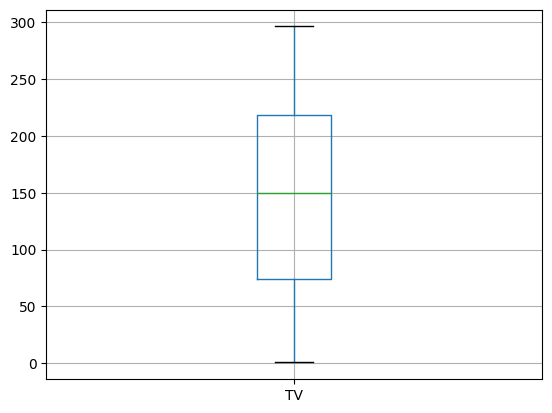

In [ ]:
df.boxplot(column=['TV'])
plt.show()


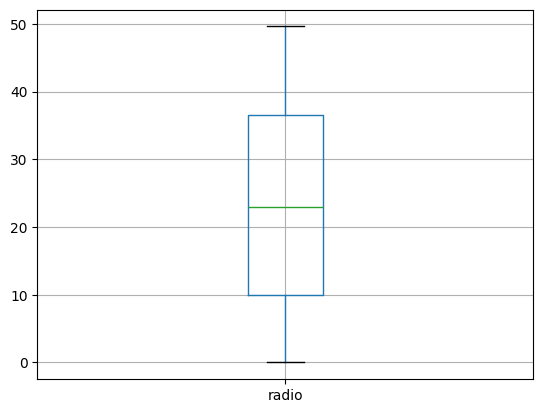

In [ ]:
df.boxplot(column=['radio'])
plt.show()


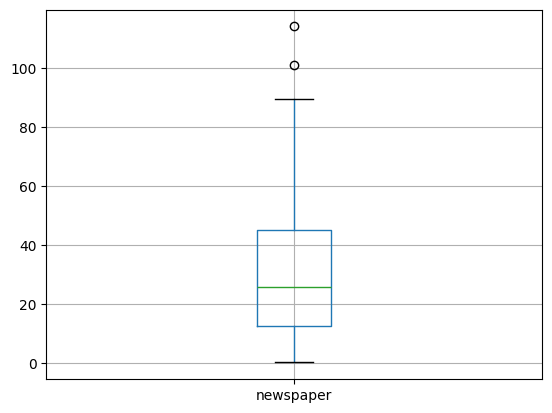

In [ ]:
df.boxplot(column=['newspaper'])
plt.show()


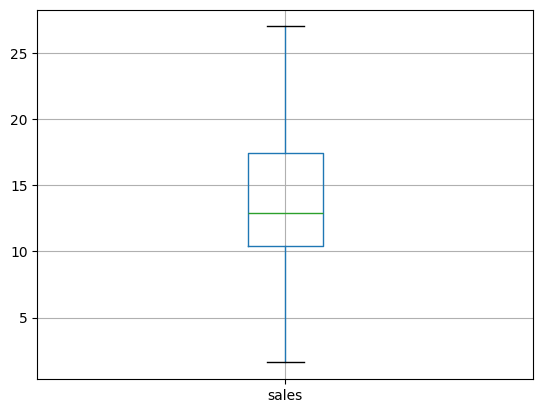

In [ ]:
df.boxplot(column=['sales'])
plt.show()


Looking at the box plot, it seems that the one variable have outlier present in the variable and the one variable is as follows:

* **newspaper**

These outliers value needs to be teated and there are several ways of treating them:

1.Drop the outlier value

2.Replace the outlier value using the IQR

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range=Q3+(1.5 * IQR)
    return lower_range, upper_range


In [ ]:
lrnewspaper,urnewspaper=remove_outlier(df['newspaper'])
df['newspaper']=np.where(df['newspaper']>urnewspaper,urnewspaper,df['newspaper'])
df['newspaper']=np.where(df['newspaper']<lrnewspaper,lrnewspaper,df['newspaper'])

**Now we will check if the outlier is removed or not**

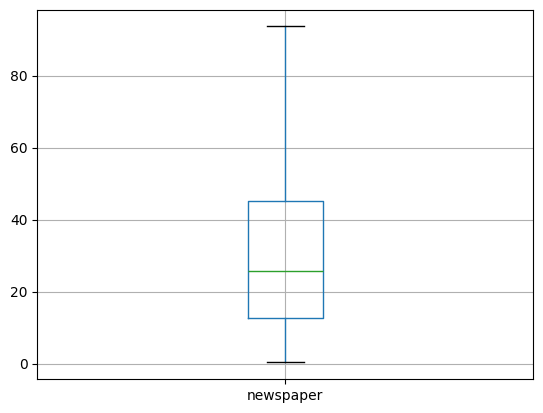

In [ ]:
df.boxplot(column=['newspaper'])
plt.show()


## **Check for Missing value**

In [ ]:
df.isnull().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


there are no missing values present

## **Normalization and Scaling(numerical variables)**

### Identifying Numerical Variables

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
print("Numerical columns:", numerical_cols)


Numerical columns: Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


### Standardization (StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
df_scaled_standard = df.copy() # Create a copy to avoid modifying the original DataFrame
df_scaled_standard[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])

print("DataFrame after Standardization:")
display(df_scaled_standard.head())



DataFrame after Standardization:


,TV,radio,newspaper,sales
0,0.969852,0.981522,1.823979,1.552053
1,-1.197376,1.082808,0.690583,-0.696046
2,-1.516155,1.528463,1.828682,-0.907406
3,0.052050,1.217855,1.320770,0.860330
4,0.394182,-0.841614,1.316067,-0.215683


### Normalization (MinMaxScaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
df_scaled_minmax = df.copy() # Create a copy to avoid modifying the original DataFrame
df_scaled_minmax[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

print("DataFrame after Normalization:")
display(df_scaled_minmax.head())


DataFrame after Normalization:


,TV,radio,newspaper,sales
0,0.775786,0.762097,0.738280,0.807087
1,0.148123,0.792339,0.480043,0.346457
2,0.055800,0.925403,0.739352,0.303150
3,0.509976,0.832661,0.623627,0.665354
4,0.609063,0.217742,0.622556,0.444882


**Now you have two new DataFrames, df_scaled_standard and df_scaled_minmax, with the numerical columns scaled using Standardization and Normalization respectively.**

## **Univariate Analysis**

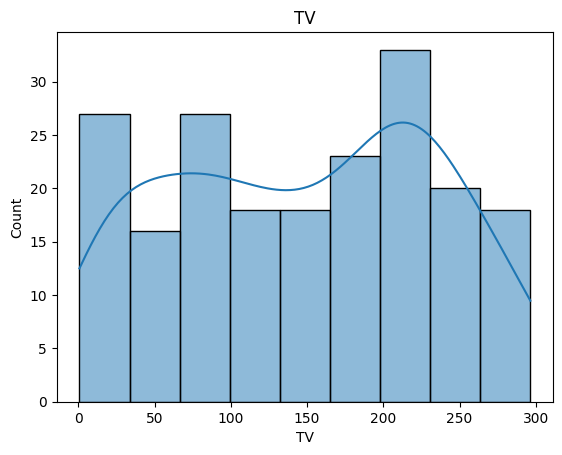

In [ ]:
sns.histplot(df['TV'], kde=True)
plt.title('TV')
plt.show()




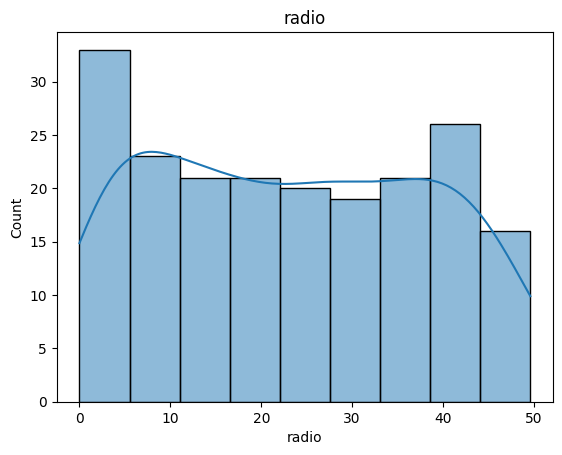

In [ ]:
sns.histplot(df['radio'], kde=True)
plt.title('radio')
plt.show()




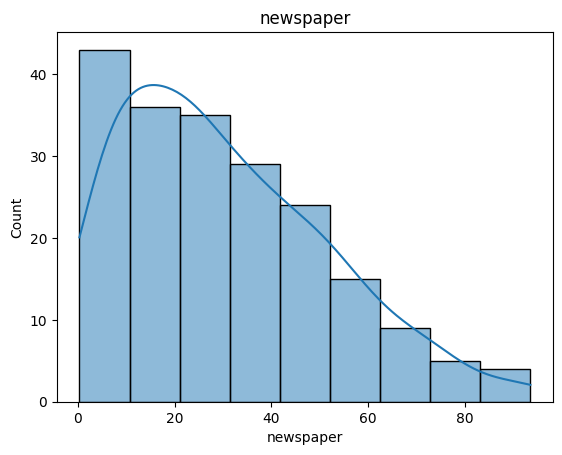

In [ ]:
sns.histplot(df['newspaper'], kde=True)
plt.title('newspaper')
plt.show()




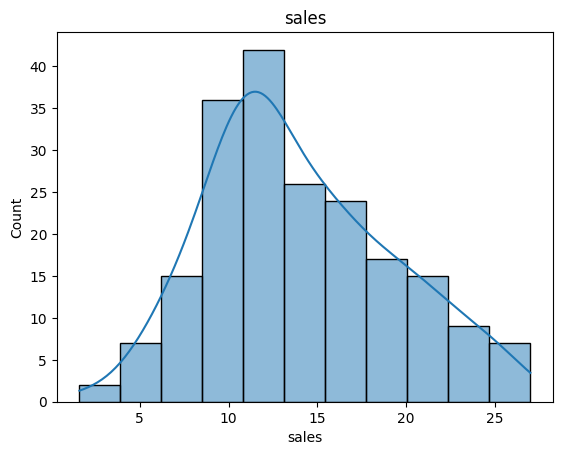

In [ ]:
sns.histplot(df['sales'], kde=True)
plt.title('sales')
plt.show()




## **Bivariate Analysis**

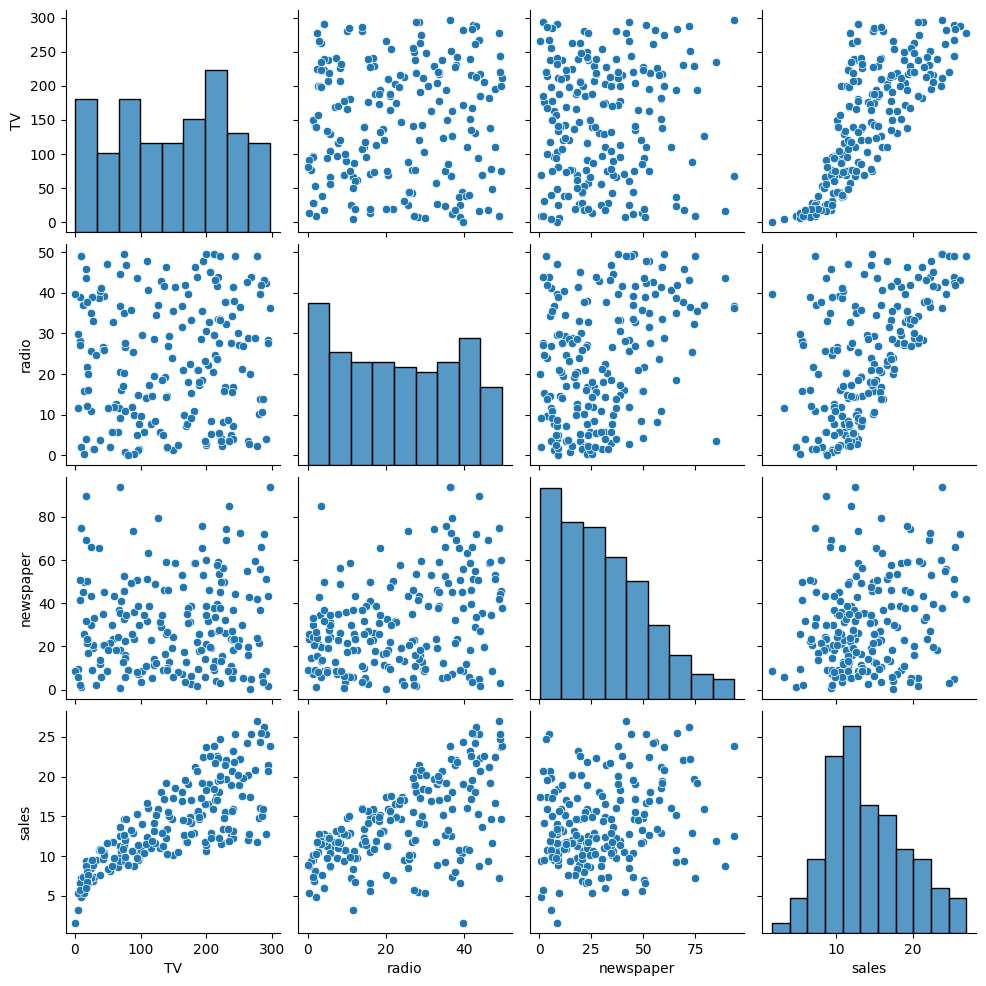

In [ ]:
sns.pairplot(df)
plt.show()

**As there are no Categorical variables, so no need to Encode Categorical Variable**

# **INDEPENDENT AND DEPENDENT VARIABLES**

In [ ]:
x = df[['TV', 'radio', 'newspaper']].values
y = df['sales'].values

# **Visual exploratory data analysis**

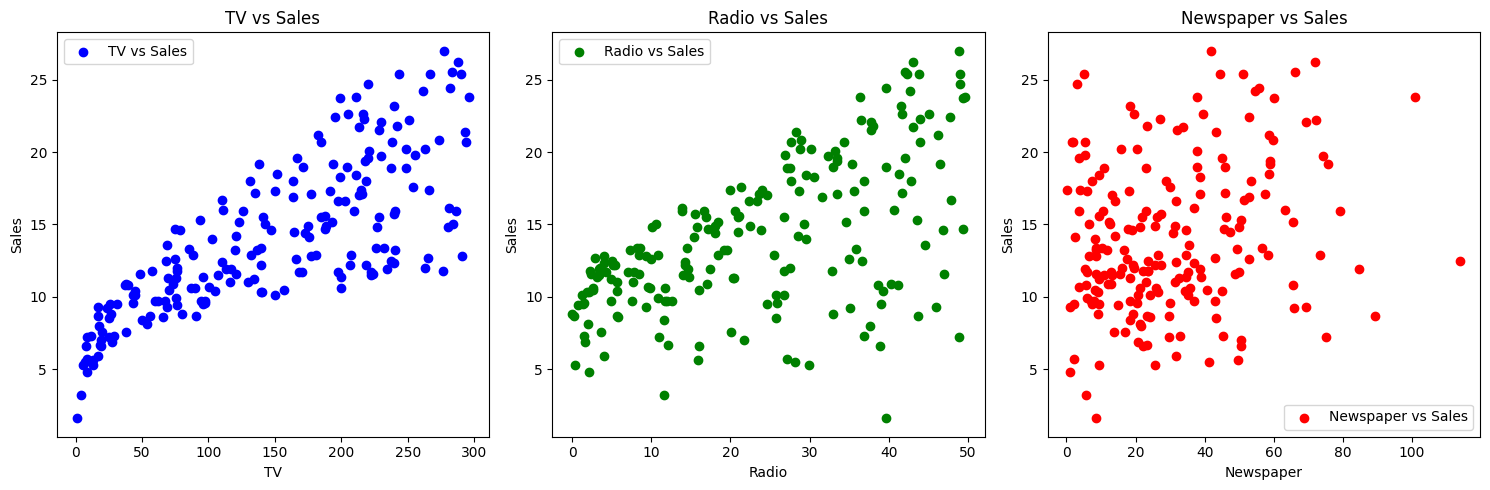

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x[:, 0], y, color='blue', label='TV vs Sales')
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(x[:, 1], y, color='green', label='Radio vs Sales')
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(x[:, 2], y, color='red', label='Newspaper vs Sales')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()

# **Checking dimensions of X and y**

We need to check the dimensions of X and y to make sure they are in right format for Scikit-Learn API.

It is an important precursor to model building.

In [ ]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


No nedd to reshape 'x' and 'y'

# **Train test split**

split the dataset into two sets namely - train set and test set.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(150, 3)
(150,)
(50, 3)
(50,)


# **Linear Regression model**

In [ ]:
regression_model= LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [ ]:

feature_names = df[['TV', 'radio', 'newspaper']].columns
coefficients = regression_model.coef_

for idx, col_name in enumerate(feature_names):
    print("The coefficient for {} is {}".format(col_name, coefficients[idx]))

The coefficient for TV is 0.046567964710956526
The coefficient for radio is 0.17917311643763933
The coefficient for newspaper is 0.003439803908238448


In [ ]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.8766153304716156


regression_model.intercept_ is a single value because our model has only one target variable ('sales'). So you don't need to use [0] to access it.

In [ ]:
# R square on training data
regression_model.score(x_train, y_train)

0.8903042068430873

89% of the variation in the log_price is explained by the predictors in the model for train set

In [ ]:
# R square on testing data
regression_model.score(x_test, y_test)

0.9156817954019896

In [ ]:
#RMSE on Training data

predicted_train=regression_model.predict(x_train)

np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

np.float64(1.7569535118821333)

In [ ]:
#RMSE on Training data

predicted_train=regression_model.predict(x_test)

np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

np.float64(1.4041483102619758)

In [ ]:
# Calculate and print r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, predicted_test)))

R2 Score value: 0.9157


# **Interpretation and Conclusion**

* Plot each individual advertising channel against sales in separate scatter plots.

* Plot the predicted sales values against the actual sales values to see how well your model's predictions match the real data.

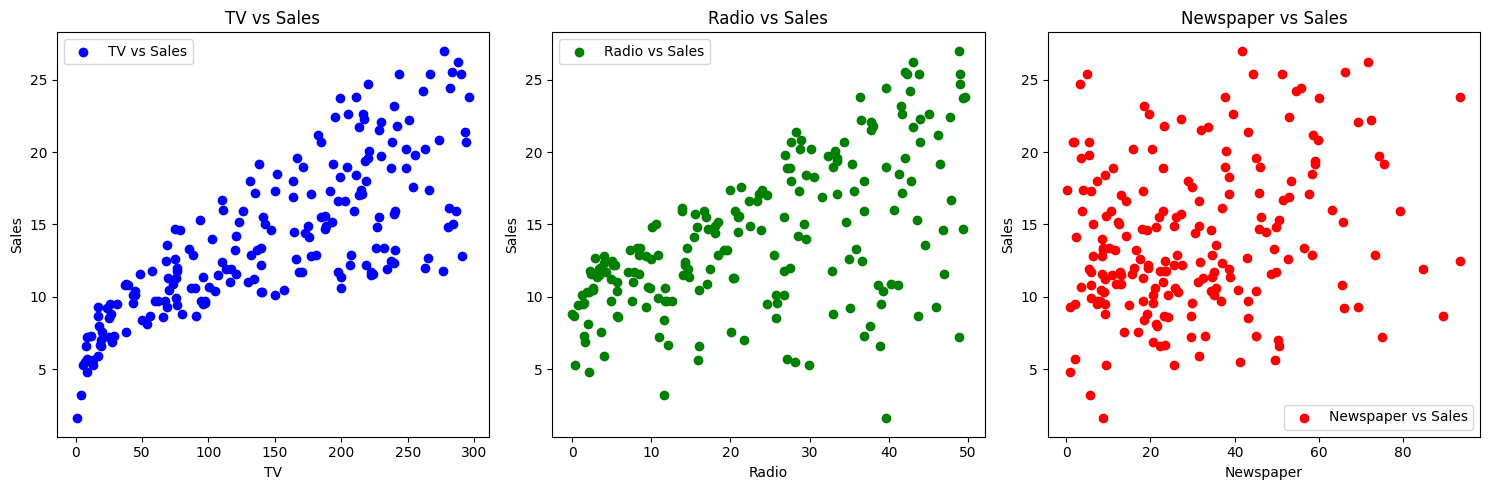

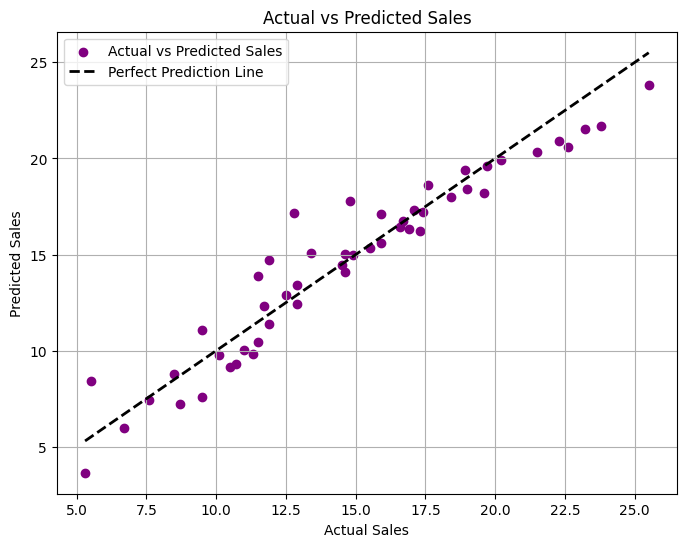

In [ ]:
# Plot actual sales vs each advertising channel
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x[:, 0], y, color='blue', label='TV vs Sales')
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(x[:, 1], y, color='green', label='Radio vs Sales')
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(x[:, 2], y, color='red', label='Newspaper vs Sales')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()

# Plot predicted sales vs actual sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_test, color='purple', label='Actual vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line') # Add a diagonal line for reference
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()

# **Residual analysis**

A linear regression model may not represent the data appropriately. The model may be a poor fit to the data. So, we should validate our model by defining and examining residual plots.

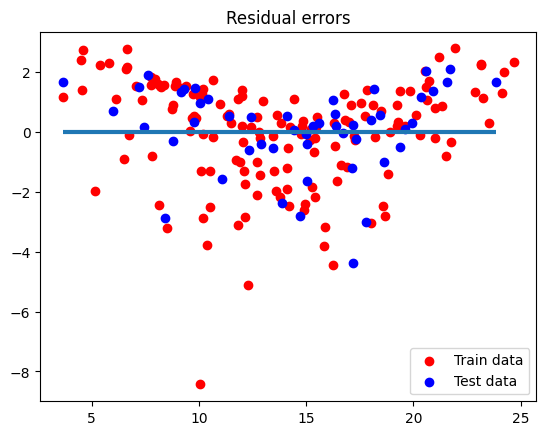

In [ ]:
# Calculate predicted values for train and test sets
predicted_train = regression_model.predict(x_train)
predicted_test = regression_model.predict(x_test)

# Calculate residuals
residuals_train = y_train - predicted_train
residuals_test = y_test - predicted_test

# Plot residuals
plt.scatter(predicted_train, residuals_train, color = 'red', label = 'Train data')
plt.scatter(predicted_test, residuals_test, color = 'blue', label = 'Test data')
plt.hlines(y = 0, xmin = predicted_test.min(), xmax = predicted_test.max(), linewidth = 3) # Draw a horizontal line at y=0
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

# **Checking for Overfitting and Underfitting**

In [ ]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(regression_model.score(x_train,y_train)))

print("Test set score: {:.4f}".format(regression_model.score(x_test,y_test)))

Training set score: 0.8903
Test set score: 0.9157


In [ ]:
# Save model for future use

import joblib
joblib.dump(regression_model, 'regression_model.pkl')

['regression_model.pkl']